# Mini Project: Tree-Based Algorithms

## The "German Credit" Dataset

### Dataset Details

This dataset has two classes (these would be considered labels in Machine Learning terms) to describe the worthiness of a personal loan: "Good" or "Bad". There are predictors related to attributes, such as: checking account status, duration, credit history, purpose of the loan, amount of the loan, savings accounts or bonds, employment duration, installment rate in percentage of disposable income, personal information, other debtors/guarantors, residence duration, property, age, other installment plans, housing, number of existing credits, job information, number of people being liable to provide maintenance for, telephone, and foreign worker status.

Many of these predictors are discrete and have been expanded into several 0/1 indicator variables (a.k.a. they have been one-hot-encoded).

This dataset has been kindly provided by Professor Dr. Hans Hofmann of the University of Hamburg, and can also be found on the UCI Machine Learning Repository.

## Decision Trees

 As we have learned in the previous lectures, Decision Trees as a family of algorithms (irrespective to the particular implementation) are powerful algorithms that can produce models with a predictive accuracy higher than that produced by linear models, such as Linear or Logistic Regression. Primarily, this is due to the fact the DT's can model nonlinear relationships, and also have a number of tuning paramters, that allow for the practicioner to achieve the best possible model. An added bonus is the ability to visualize the trained Decision Tree model, which allows for some insight into how the model has produced the predictions that it has. One caveat here, to keep in mind, is that sometimes, due to the size of the dataset (both in the sense of the number of records, as well as the number of features), the visualization might prove to be very large and complex, increasing the difficulty of interpretation.

To give you a very good example of how Decision Trees can be visualized and interpreted, we would strongly recommend that, before continuing on with solving the problems in this Mini Project, you take the time to read this fanstastic, detailed and informative blog post: http://explained.ai/decision-tree-viz/index.html

## Building Your First Decision Tree Model

So, now it's time to jump straight into the heart of the matter. Your first task, is to build a Decision Tree model, using the aforementioned "German Credit" dataset, which contains 1,000 records, and 62 columns (one of them presents the labels, and the other 61 present the potential features for the model.)

For this task, you will be using the scikit-learn library, which comes already pre-installed with the Anaconda Python distribution. In case you're not using that, you can easily install it using pip.

Before embarking on creating your first model, we would strongly encourage you to read the short tutorial for Decision Trees in scikit-learn (http://scikit-learn.org/stable/modules/tree.html), and then dive a bit deeper into the documentation of the algorithm itself (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html). 

Also, since you want to be able to present the results of your model, we suggest you take a look at the tutorial for accuracy metrics for classification models (http://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) as well as the more detailed documentation (http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html).

Finally, an *amazing* resource that explains the various classification model accuracy metrics, as well as the relationships between them, can be found on Wikipedia: https://en.wikipedia.org/wiki/Confusion_matrix

(Note: as you've already learned in the Logistic Regression mini project, a standard practice in Machine Learning for achieving the best possible result when training a model is to use hyperparameter tuning, through Grid Search and k-fold Cross Validation. We strongly encourage you to use it here as well, not just because it's standard practice, but also becuase it's not going to be computationally to intensive, due to the size of the dataset that you're working with. Our suggestion here is that you split the data into 70% training, and 30% testing. Then, do the hyperparameter tuning and Cross Validation on the training set, and afterwards to a final test on the testing set.)

### Now we pass the torch onto you! You can start building your first Decision Tree model! :)

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
!wget https://github.com/dberwang/mec-mini-projects/raw/master/mec-13.5.1-tree-based-algorithms-mini-project/GermanCredit.csv.zip

--2022-09-18 18:46:05--  https://github.com/dberwang/mec-mini-projects/raw/master/mec-13.5.1-tree-based-algorithms-mini-project/GermanCredit.csv.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dberwang/mec-mini-projects/master/mec-13.5.1-tree-based-algorithms-mini-project/GermanCredit.csv.zip [following]
--2022-09-18 18:46:05--  https://raw.githubusercontent.com/dberwang/mec-mini-projects/master/mec-13.5.1-tree-based-algorithms-mini-project/GermanCredit.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17570 (17K) [application/zip]
Saving to: ‘GermanCredit.csv.zip’

GermanCredit.csv.zi

In [4]:
# load the csv data and create a dataframe
df = pd.read_csv('GermanCredit.csv.zip')

# Replace our target class with 1 for Good and 0 for Bad
df['Class'] = df['Class'].replace('Good', 1).replace('Bad', 0)

# check if we have any null values, 
assert(df.isnull().values.any() == False)

# create a numpy array with the column names
column_names = list(np.delete(df.columns.values, 9))

# create X, y and split data with 70% for training and 30% testing
X = df.drop('Class', axis = 1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

df.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans.Bank,OtherInstallmentPlans.Stores,OtherInstallmentPlans.None,Housing.Rent,Housing.Own,Housing.ForFree,Job.UnemployedUnskilled,Job.UnskilledResident,Job.SkilledEmployee,Job.Management.SelfEmp.HighlyQualified
0,6,1169,4,4,67,2,1,0,1,1,...,0,0,1,0,1,0,0,0,1,0
1,48,5951,2,2,22,1,1,1,1,0,...,0,0,1,0,1,0,0,0,1,0
2,12,2096,2,3,49,1,2,1,1,1,...,0,0,1,0,1,0,0,1,0,0
3,42,7882,2,4,45,1,2,1,1,1,...,0,0,1,0,0,1,0,0,1,0
4,24,4870,3,4,53,2,2,1,1,0,...,0,0,1,0,0,1,0,0,1,0


In [5]:
# Your code here! :)
from sklearn import tree
from sklearn.model_selection import KFold

# create the classifier and fit with the training data
dt = tree.DecisionTreeClassifier()

# print out the default settings for the classifier
print(dt.__dict__)

{'criterion': 'gini', 'splitter': 'best', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'max_features': None, 'max_leaf_nodes': None, 'random_state': None, 'min_impurity_decrease': 0.0, 'class_weight': None, 'ccp_alpha': 0.0}


In [ ]:
# perform grid search to tune hyperparameters 
parameters = {'max_depth': [2,4,6,8], \
              'min_samples_split': [2, 3, 4, 5, 6]}

# per the instructions use k-fold Cross Validation
# specify the splits = 10
cv_kfold = KFold(n_splits = 10, shuffle=True)

# perform a grid search for the best settings for the hyperparameters
dt_grid = GridSearchCV(dt, param_grid=parameters, cv=cv_kfold, scoring="accuracy", verbose=1)
dt_grid.fit(X_train, y_train)

In [7]:
# Print best parameters from the grid search
print('Best grid parameters: ' + str(dt_grid.best_params_))

# Print best score from the grid search
print('\nBest grid score: ' + str(round(dt_grid.best_score_, 4)))


Best grid parameters: {'max_depth': 4, 'min_samples_split': 2}

Best grid score: 0.6957


In [8]:
# build a dt classifier with the best parameters from the gridsearch cv
print(classification_report(y_test, dt_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.52      0.51      0.51        94
           1       0.78      0.78      0.78       206

    accuracy                           0.70       300
   macro avg       0.65      0.65      0.65       300
weighted avg       0.70      0.70      0.70       300



In [9]:
dt_accuracy = accuracy_score(y_test, dt_grid.predict(X_test))
print(dt_accuracy)

0.6966666666666667


### After you've built the best model you can, now it's time to visualize it!

Rememeber that amazing blog post from a few paragraphs ago, that demonstrated how to visualize and interpret the results of your Decision Tree model. We've seen that this can perform very well, but let's see how it does on the "German Credit" dataset that we're working on, due to it being a bit larger than the one used by the blog authors.

First, we're going to need to install their package. If you're using Anaconda, this can be done easily by running:

In [10]:
! pip install dtreeviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 825 kB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.3.7-py3-none-any.whl size=68151 sha256=01ac9799da28f47c7d7497e515f7012ff2161f75f6d5fa0a6ae0a98f732cfe9f
  Stored in directory: /root/.cache/pip/wheels/bf/ba/9f/87c689d8d3c2916793f2dccc57d3dc3b283e0ccf8cb4ca4cad
Successfully built dtreeviz


In [11]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


If for any reason this way of installing doesn't work for you straight out of the box, please refer to the more detailed documentation here: https://github.com/parrt/dtreeviz

Now you're ready to visualize your Decision Tree model! Please feel free to use the blog post for guidance and inspiration!

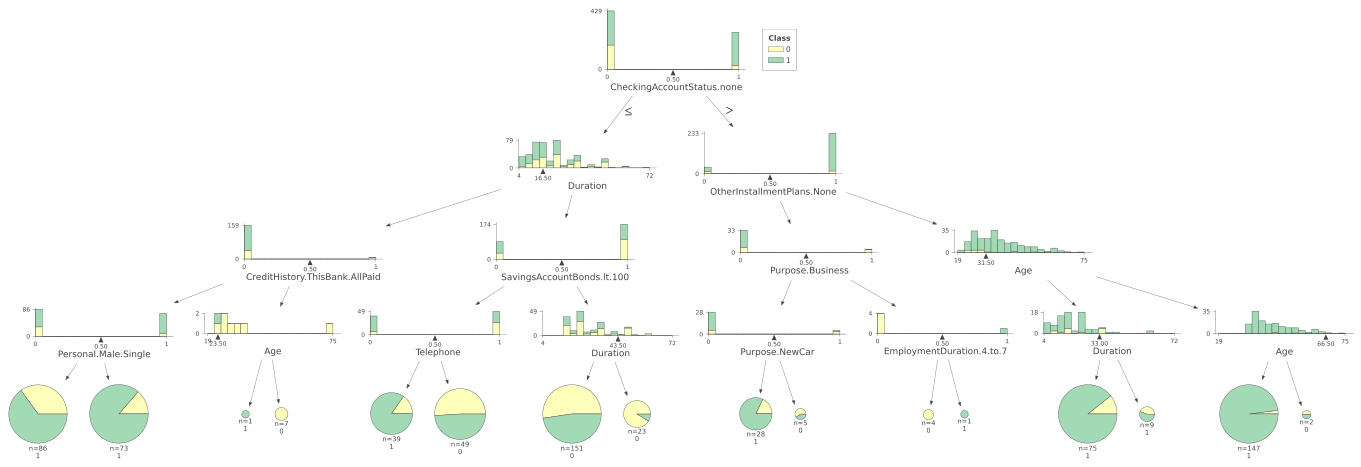

In [38]:
# Your code here! :)
from dtreeviz.trees import *

# create the Decision Tree Classifier using the best hyperparameters from the grid search and fit it with our training data
dt = DecisionTreeClassifier(max_depth = dt_grid.best_params_['max_depth'], min_samples_split = dt_grid.best_params_['min_samples_split'])
dt.fit(X_train.values, y_train.values)

# turn of the deprecation warning regarding ragged nested sequences
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

# Visualize the dt model
viz = dtreeviz(dt, \
               X_train.values, \
               y_train.values, \
               target_name = 'Class',
               feature_names = X_train.columns,
               class_names = [0, 1])

viz

## Random Forests

As discussed in the lecture videos, Decision Tree algorithms also have certain undesireable properties. Mainly the have low bias, which is good, but tend to have high variance - which is *not* so good (more about this problem here: https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff).

Noticing these problems, the late Professor Leo Breiman, in 2001, developed the Random Forests algorithm, which mitigates these problems, while at the same time providing even higher predictive accuracy than the majority of Decision Tree algorithm implementations. While the curriculum contains two excellent lectures on Random Forests, if you're interested, you can dive into the original paper here: https://link.springer.com/content/pdf/10.1023%2FA%3A1010933404324.pdf.

In the next part of this assignment, your are going to use the same "German Credit" dataset to train, tune, and measure the performance of a Random Forests model. You will also see certain functionalities that this model, even though it's a bit of a "black box", provides for some degree of interpretability.

First, let's build a Random Forests model, using the same best practices that you've used for your Decision Trees model. You can reuse the things you've already imported there, so no need to do any re-imports, new train/test splits, or loading up the data again.

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
# Your code here! :)
rf = RandomForestClassifier()

# print out the default settings for the classifier
print(rf.__dict__)

{'base_estimator': DecisionTreeClassifier(), 'n_estimators': 100, 'estimator_params': ('criterion', 'max_depth', 'min_samples_split', 'min_samples_leaf', 'min_weight_fraction_leaf', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'random_state', 'ccp_alpha'), 'bootstrap': True, 'oob_score': False, 'n_jobs': None, 'random_state': None, 'verbose': 0, 'warm_start': False, 'class_weight': None, 'max_samples': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.0, 'max_features': 'auto', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'ccp_alpha': 0.0}


In [68]:
# perform grid search to tune hyperparameters
parameters = {'n_estimators' : [50, 100, 150], \
              'max_features': [8, 10, 12, 13, 14, 15], \
              'max_depth': [8, 10, 12, 13, 14, 15]}

# per the instructions use k-fold Cross Validation
# specify the splits = 10
cv_kfold = KFold(n_splits = 10, shuffle=True)

# perform a grid search for the best settings for the hyperparameters
rf_grid = GridSearchCV(rf, param_grid=parameters, cv=cv_kfold, scoring="accuracy", verbose=1)
rf_grid.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=RandomForestClassifier(max_depth=15, max_features=10),
             param_grid={'max_depth': [8, 10, 12, 13, 14, 15],
                         'max_features': [8, 10, 12, 13, 14, 15],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy', verbose=1)

In [42]:
# Print best parameters from the grid search
print('Best grid parameters: ' + str(rf_grid.best_params_))

# Print best score from the grid search
print('\nBest grid score: ' + str(round(rf_grid.best_score_, 4)))

Best grid parameters: {'max_depth': 15, 'max_features': 10, 'n_estimators': 100}

Best grid score: 0.7771


In [43]:
# build a dt classifier with the best parameters from the gridsearch cv
print(classification_report(y_test, rf_grid.predict(X_test)))

              precision    recall  f1-score   support

           0       0.69      0.38      0.49        94
           1       0.77      0.92      0.84       206

    accuracy                           0.75       300
   macro avg       0.73      0.65      0.67       300
weighted avg       0.74      0.75      0.73       300



In [44]:
rf_accuracy = accuracy_score(y_test, rf_grid.predict(X_test))
print(rf_accuracy)

0.7533333333333333


As mentioned, there are certain ways to "peek" into a model created by the Random Forests algorithm. The first, and most popular one, is the Feature Importance calculation functionality. This allows the ML practitioner to see an ordering of the importance of the features that have contributed the most to the predictive accuracy of the model. 

You can see how to use this in the scikit-learn documentation (http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier.feature_importances_). Now, if you tried this, you would just get an ordered table of not directly interpretable numeric values. Thus, it's much more useful to show the feature importance in a visual way. You can see an example of how that's done here: http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html#sphx-glr-auto-examples-ensemble-plot-forest-importances-py

Now you try! Let's visualize the importance of features from your Random Forests model!

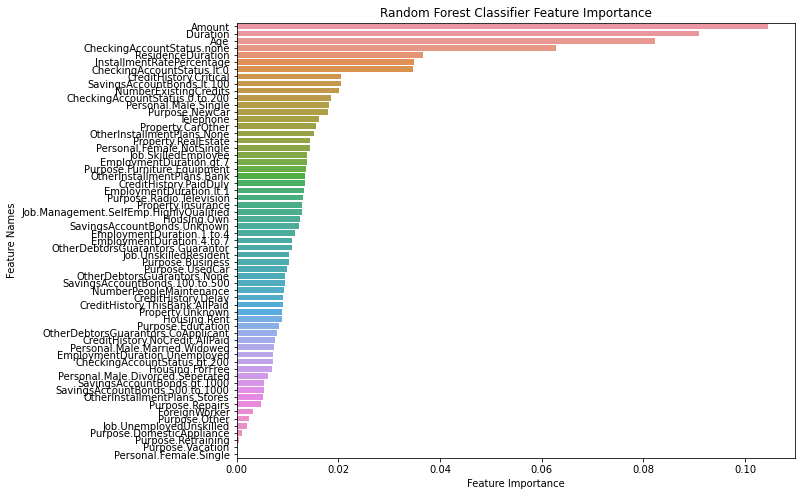

In [45]:
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns

rf = RandomForestClassifier(n_estimators = rf_grid.best_params_['n_estimators'], \
                            max_features = rf_grid.best_params_['max_features'], \
                            max_depth = rf_grid.best_params_['max_depth']
                            )
rf.fit(X_train, y_train)

# The following function is from an analyze up post at the following: 
# https://www.analyseup.com/learn-python-for-data-science/python-random-forest-feature-importance-plot.html
def plot_feature_importance(importance, names, model_type):
    
    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    
    #Add chart labels
    plt.title(model_type + ' Feature Importance')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Names')

plot_feature_importance(rf.feature_importances_, column_names, 'Random Forest Classifier')

A final method for gaining some insight into the inner working of your Random Forests models is a so-called Partial Dependence Plot. The Partial Dependence Plot (PDP or PD plot) shows the marginal effect of a feature on the predicted outcome of a previously fit model. The prediction function is fixed at a few values of the chosen features and averaged over the other features. A partial dependence plot can show if the relationship between the target and a feature is linear, monotonic or more complex. 

In scikit-learn, PDPs are implemented and available for certain algorithms, but at this point (version 0.20.0) they are not yet implemented for Random Forests. Thankfully, there is an add-on package called **PDPbox** (https://pdpbox.readthedocs.io/en/latest/) which adds this functionality to Random Forests. The package is easy to install through pip.

In [46]:
! pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 34.0 MB 1.3 MB/s 
     |████████████████████████████████| 13.1 MB 40.5 MB/s 
  Created wheel for pdpbox: filename=PDPbox-0.2.1-py3-none-any.whl size=35758224 sha256=609692f5c02d87049d232e132b77f43bd13680409a5d7a3ec2205cd58f5de415
  Stored in directory: /root/.cache/pip/wheels/f4/d0/1a/b80035625c53131f52906a6fc4dd690d8efd2bf8af6a4015eb
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=2d5b88bfc3e72a2ae3b8c208e92b63b82c2666a6cc529243ff65252fd0d70baf
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pdpbox sklearn
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2


While we encourage you to read the documentation for the package (and reading package documentation in general is a good habit to develop), the authors of the package have also written an excellent blog post on how to use it, showing examples on different algorithms from scikit-learn (the Random Forests example is towards the end of the blog post): https://briangriner.github.io/Partial_Dependence_Plots_presentation-BrianGriner-PrincetonPublicLibrary-4.14.18-updated-4.22.18.html

So, armed with this new knowledge, feel free to pick a few features, and make a couple of Partial Dependence Plots of your own!

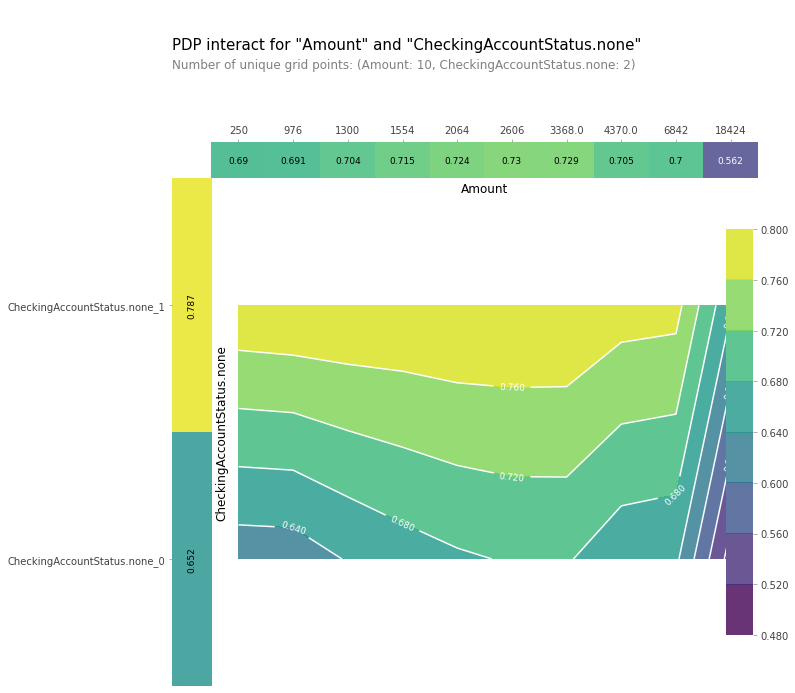

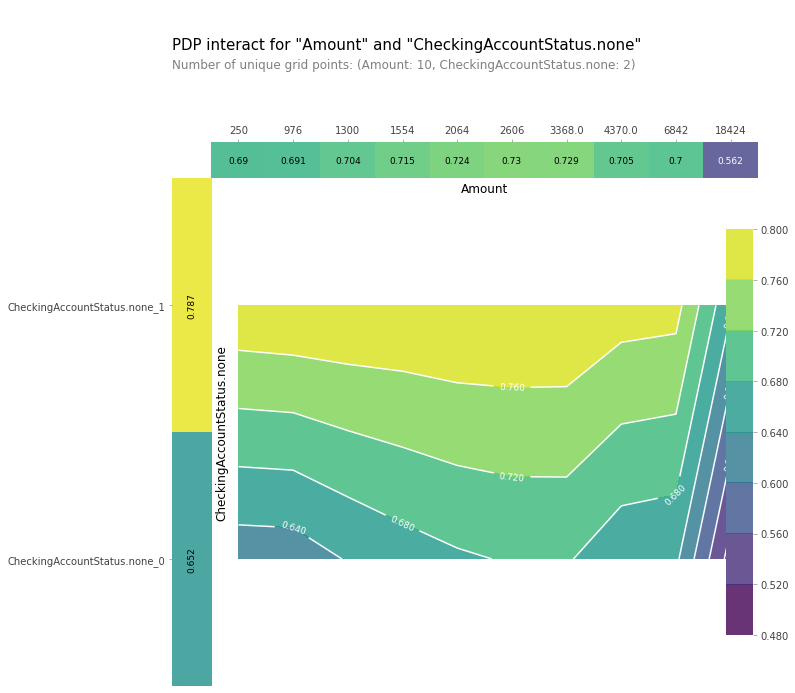

In [47]:
# Your code here!
# the blog post link did not work! I used the below.
# https://pdpbox.readthedocs.io/en/latest/pdp_plot.html

from pdpbox import pdp

feat_pair = ['Amount', 'CheckingAccountStatus.none']

pdp_feat_pair = pdp.pdp_interact(model = rf, dataset = df, \
                                model_features = X.columns, features = feat_pair)

fig,axes = pdp.pdp_interact_plot(pdp_interact_out = pdp_feat_pair, feature_names = feat_pair, \
                                 plot_type='contour', x_quantile=True, plot_pdp=True)

fig



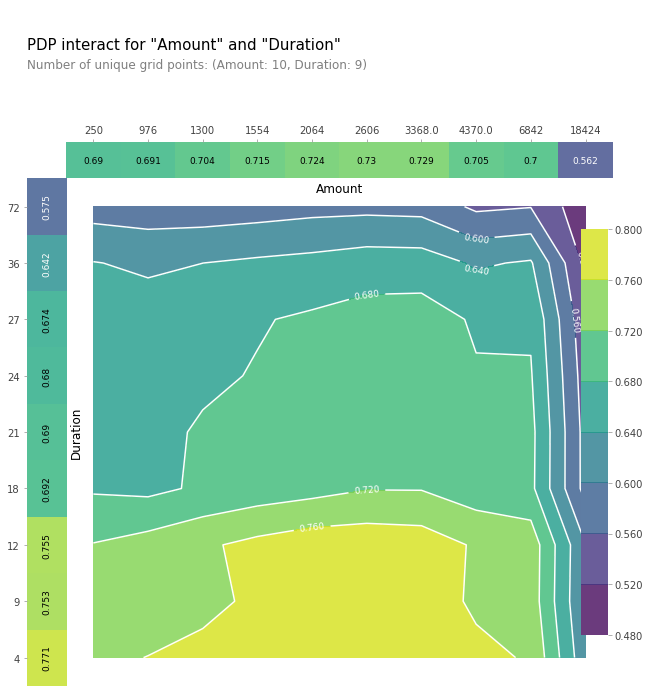

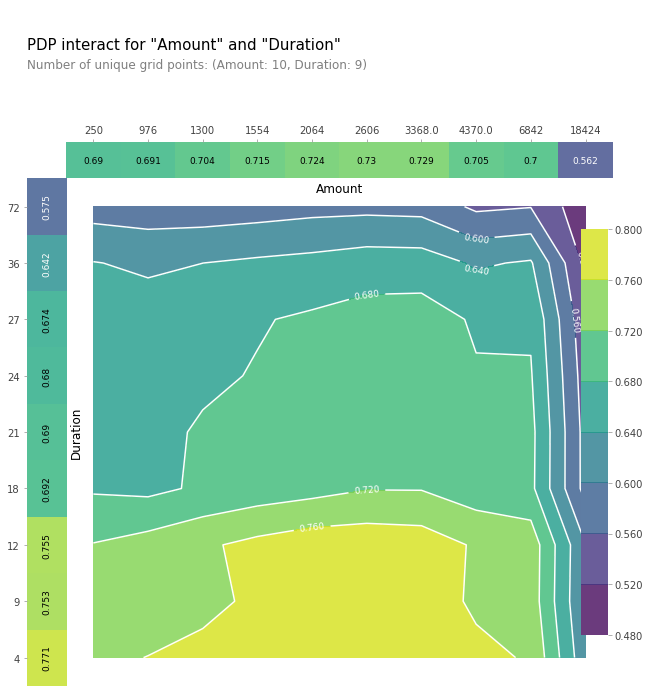

In [48]:
# Your code here!
# the blog post link did not work! I used the below.
# https://pdpbox.readthedocs.io/en/latest/pdp_plot.html

from pdpbox import pdp

feat_pair = ['Amount', 'Duration']

pdp_feat_pair = pdp.pdp_interact(model = rf, dataset = df, \
                                model_features = X.columns, features = feat_pair)

fig,axes = pdp.pdp_interact_plot(pdp_interact_out = pdp_feat_pair, feature_names = feat_pair, \
                                 plot_type='contour', x_quantile=True, plot_pdp=True)

fig



## (Optional) Advanced Boosting-Based Algorithms

As explained in the video lectures, the next generation of algorithms after Random Forests (that use Bagging, a.k.a. Bootstrap Aggregation) were developed using Boosting, and the first one of these were Gradient Boosted Machines, which are implemented in scikit-learn (http://scikit-learn.org/stable/modules/ensemble.html#gradient-tree-boosting).

Still, in recent years, a number of variations on GBMs have been developed by different research amd industry groups, all of them bringing improvements, both in speed, accuracy and functionality to the original Gradient Boosting algorithms.

In no order of preference, these are:
1. **XGBoost**: https://xgboost.readthedocs.io/en/latest/
2. **CatBoost**: https://tech.yandex.com/catboost/
3. **LightGBM**: https://lightgbm.readthedocs.io/en/latest/

If you're using the Anaconda distribution, these are all very easy to install:

In [49]:
! conda install -c anaconda py-xgboost

/bin/bash: conda: command not found


In [50]:
! conda install -c conda-forge catboost

/bin/bash: conda: command not found


In [51]:
! pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 75 kB/s 


In [52]:
! conda install -c conda-forge lightgbm

/bin/bash: conda: command not found


Your task in this optional section of the mini project is to read the documentation of these three libraries, and apply all of them to the "German Credit" dataset, just like you did in the case of Decision Trees and Random Forests.

The final deliverable of this section should be a table (can be a pandas DataFrame) which shows the accuracy of all the five algorthms taught in this mini project in one place.

Happy modeling! :)

### XGBoost

In [101]:
# Look up the parameters for the classifier
from xgboost import XGBClassifier

print(XGBClassifier().__dict__)

{'max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 100, 'verbosity': 1, 'silent': None, 'objective': 'binary:logistic', 'booster': 'gbtree', 'gamma': 0, 'min_child_weight': 1, 'max_delta_step': 0, 'subsample': 1, 'colsample_bytree': 1, 'colsample_bylevel': 1, 'colsample_bynode': 1, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'base_score': 0.5, 'missing': nan, 'kwargs': {}, '_Booster': None, 'seed': None, 'random_state': 0, 'nthread': None, 'n_jobs': 1, 'importance_type': 'gain'}


In [ ]:
xgb_clf = XGBClassifier()

# according to this article the six most important hyperparameters are
# https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76#:~:text=Arguably%2C%20there%20are%20six%20(6,maximum%20tree%20depth%20(a%20regularization
#(1) how many sub-trees to train
#(2) the maximum tree depth (a regularization hyperparameter)
#(3) the learning rate
#(4) the L1 (reg_alpha) and L2 (reg_ lambda) regularization rates that determine the extremity of weights on the leaves
#(5) the complexity control (gamma=γ), a pseudo- regularization hyperparameter; and, 
#(6) minimum child weight

# perform grid search to tune hyperparameters
parameters = {'n_estimators' : [50, 100, 200], \
              'max_depth' : [3, 4, 5], \
              'learning_rate': [0.05, 0.1, 0.3], \
              'reg_alpha' : [0, 0.005], \
              'reg_lambda' : [0.1, 1, 5], \
              'gamma' : [0, 0.1], \
              'min_child_weight' : [1, 2, 3]
              }

# per the instructions use k-fold Cross Validation
# specify the splits = 10
cv_kfold = KFold(n_splits = 10, shuffle=True)

# perform a grid search for the best hyperparameters
xgb_grid = GridSearchCV(xgb_clf, param_grid=parameters, cv=cv_kfold, scoring="accuracy", verbose=1)
xgb_grid.fit(X_train, y_train)


Fitting 10 folds for each of 972 candidates, totalling 9720 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=XGBClassifier(),
             param_grid={'gamma': [0, 0.1], 'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [50, 100, 200],
                         'reg_alpha': [0, 0.005], 'reg_lambda': [0.1, 1, 5]},
             scoring='accuracy', verbose=1)

In [119]:
xgb_clf = XGBClassifier()

# according to this article the six most important hyperparameters are
# https://towardsdatascience.com/mastering-xgboost-2eb6bce6bc76#:~:text=Arguably%2C%20there%20are%20six%20(6,maximum%20tree%20depth%20(a%20regularization
#(1) how many sub-trees to train
#(2) the maximum tree depth (a regularization hyperparameter)
#(3) the learning rate
#(4) the L1 (reg_alpha) and L2 (reg_ lambda) regularization rates that determine the extremity of weights on the leaves
#(5) the complexity control (gamma=γ), a pseudo- regularization hyperparameter; and, 
#(6) minimum child weight

# perform grid search to tune hyperparameters
parameters = {'n_estimators' : [50, 100, 200], \
              'max_depth' : [3, 5, 7], \
              'learning_rate': [0.05, 0.1, 0.3], \
              'reg_alpha' : [0, 0.1, 0.2], \
              'reg_lambda' : [0.1, 1, 5], \
              'gamma' : [0, 0.1], \
              'min_child_weight' : [1, 2, 3]
              }

# per the instructions use k-fold Cross Validation
# specify the splits = 10
cv_kfold = KFold(n_splits = 10, shuffle=True)

# perform a grid search for the best hyperparameters
xgb_grid = GridSearchCV(xgb_clf, param_grid=parameters, cv=cv_kfold, scoring="accuracy", verbose=1)
xgb_grid.fit(X_train, y_train)

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=XGBClassifier(),
             param_grid={'gamma': [0, 0.1], 'learning_rate': [0.05, 0.1, 0.3],
                         'max_depth': [3, 4, 5], 'min_child_weight': [1, 2, 3],
                         'n_estimators': [50, 100, 200],
                         'reg_alpha': [0, 0.1, 0.2],
                         'reg_lambda': [0.1, 1, 5]},
             scoring='accuracy', verbose=1)

In [127]:
# Print best parameters from the grid search
print('Best grid parameters: ' + str(xgb_grid.best_params_))

# Print best score from the grid search
print('\nBest grid score: ' + str(round(xgb_grid.best_score_, 4)))


Best grid parameters: {'gamma': 0, 'learning_rate': 0.3, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 100, 'reg_alpha': 0.2, 'reg_lambda': 0.1}

Best grid score: 0.7729


In [128]:
# fit and score the best model
xgb_clf = XGBClassifier(learning_rate = xgb_grid.best_params_['learning_rate'], \
                        max_depth = xgb_grid.best_params_['max_depth'], \
                        n_estimators = xgb_grid.best_params_['n_estimators'] \
                        )
xgb_clf.fit(X_train, y_train)

xgb_accuracy = accuracy_score(y_test, xgb_clf.predict(X_test))

print(xgb_accuracy)

0.7633333333333333


### CatBoost

In [ ]:
from catboost import CatBoostClassifier

cb_clf = CatBoostClassifier()

# perform grid search to tune hyperparameters
parameters = {"n_estimators" : [150, 400], \
              "depth" : [2, 7], \
              "learning_rate" : [.01, 0.2], \
              "subsample" : [0.6, 1], \
              "max_bin" : [150, 300], \
              "l2_leaf_reg" : [0, 10], \
              "model_size_reg" : [0, 10] \
              }

# per the instructions use k-fold Cross Validation
# specify the splits = 10
cv_kfold = KFold(n_splits = 10, shuffle=True)

# perform a grid search for the best hyperparameters
cb_grid = GridSearchCV(cb_clf, param_grid=parameters, cv=cv_kfold, scoring="accuracy", verbose=1)
cb_grid.fit(X_train, y_train)

In [88]:
# Print best parameters from the grid search
print('Best grid parameters: ' + str(cb_grid.best_params_))

# Print best score from the grid search
print('\nBest grid score: ' + str(round(cb_grid.best_score_, 4)))

Best grid parameters: {'depth': 2, 'l2_leaf_reg': 10, 'learning_rate': 0.2, 'max_bin': 150, 'model_size_reg': 0, 'n_estimators': 150, 'subsample': 0.6}

Best grid score: 0.77


In [ ]:
# fit and score our best model
cb_clf = CatBoostClassifier(n_estimators = cb_grid.best_params_['n_estimators'], \
                      depth = cb_grid.best_params_['depth'], \
                      learning_rate = cb_grid.best_params_['learning_rate'], \
                      subsample = cb_grid.best_params_['subsample'], \
                      max_bin = cb_grid.best_params_['max_bin'], \
                      l2_leaf_reg = cb_grid.best_params_['l2_leaf_reg'], \
                      model_size_reg = cb_grid.best_params_['model_size_reg'] \
                      )

cb_clf.fit(X_train, y_train)

cb_accuracy = accuracy_score(y_test, cb_clf.predict(X_test))

print(cb_accuracy)

### LightGBM

In [102]:
# Look up the parameters for the classifier
from lightgbm import LGBMClassifier

print(LGBMClassifier().__dict__)

{'boosting_type': 'gbdt', 'objective': None, 'num_leaves': 31, 'max_depth': -1, 'learning_rate': 0.1, 'n_estimators': 100, 'subsample_for_bin': 200000, 'min_split_gain': 0.0, 'min_child_weight': 0.001, 'min_child_samples': 20, 'subsample': 1.0, 'subsample_freq': 0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'random_state': None, 'n_jobs': -1, 'silent': True, 'importance_type': 'split', '_Booster': None, '_evals_result': None, '_best_score': None, '_best_iteration': None, '_other_params': {}, '_objective': None, 'class_weight': None, '_n_features': None, '_classes': None, '_n_classes': None}


In [122]:
ltb_clf = LGBMClassifier()

# perform grid search to tune hyperparameters
parameters = {"n_estimators" : [100, 400, 600, 800], \
              "learning_rate" : [.01, 0.2], \
              "num_leaves" : [31, 50], \
              "max_depth" : [-1, 3], \
              "reg_alpha" : [0, 0.1, 1, 10], \
              "reg_lambda" : [0, 0.1, 1, 10]
              }

# per the instructions use k-fold Cross Validation
# specify the splits = 10
cv_kfold = KFold(n_splits = 10, shuffle=True)

# perform a grid search for the best hyperparameters
ltb_grid = GridSearchCV(ltb_clf, param_grid=parameters, cv=cv_kfold, scoring="accuracy", verbose=1)
ltb_grid.fit(X_train, y_train)

Fitting 10 folds for each of 512 candidates, totalling 5120 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.2], 'max_depth': [-1, 3],
                         'n_estimators': [100, 400, 600, 800],
                         'num_leaves': [31, 50], 'reg_alpha': [0, 0.1, 1, 10],
                         'reg_lambda': [0, 0.1, 1, 10]},
             scoring='accuracy', verbose=1)

In [123]:
# Print best parameters from the grid search
print('Best grid parameters: ' + str(ltb_grid.best_params_))

# Print best score from the grid search
print('\nBest grid score: ' + str(round(ltb_grid.best_score_, 4)))

Best grid parameters: {'learning_rate': 0.01, 'max_depth': -1, 'n_estimators': 600, 'num_leaves': 31, 'reg_alpha': 1, 'reg_lambda': 10}

Best grid score: 0.7771


In [125]:
# fit and score our best model
ltb_clf = LGBMClassifier(n_estimators = ltb_grid.best_params_['n_estimators'], \
                      learning_rate = ltb_grid.best_params_['learning_rate'], \
                      num_leaves = ltb_grid.best_params_['num_leaves'], \
                      max_depth = ltb_grid.best_params_['max_depth'], \
                      reg_alpha = ltb_grid.best_params_['reg_alpha'], \
                      reg_lambda = ltb_grid.best_params_['reg_lambda'] \
                      )

ltb_clf.fit(X_train, y_train)

ltb_accuracy = accuracy_score(y_test, ltb_clf.predict(X_test))

print(ltb_accuracy)

0.75


In [129]:
# create a dataframe with the accuracy scores for each of the five models
index = ['Decision Tree', 'Random Forest', 'XGBoost', 'CatBoost', 'LightGBM']
accuracy_scores = {'Accuracy Score': [dt_accuracy, rf_accuracy, xgb_accuracy, cb_accuracy, ltb_accuracy]}

acc_df = pd.DataFrame(accuracy_scores, index=index).sort_values(by = 'Accuracy Score', ascending = False)
acc_df

,Accuracy Score
XGBoost,0.763333
CatBoost,0.756667
Random Forest,0.753333
LightGBM,0.750000
Decision Tree,0.696667
